In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# upload dataset
df = pd.read_csv(list(uploaded.keys())[0])
print("Dataset Loaded Successfully!\n")
df.head()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv
Dataset Loaded Successfully!



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Display dataset information, shape, and summary statistics
print("---------- INFO ----------")
print(df.info())

print("\n---------- SHAPE ----------")
print(df.shape)

df.describe()


---------- INFO ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
print("\nMissing values BEFORE conversion:")
print(df.isnull().sum())

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

print("\nMissing values AFTER conversion:")
print(df.isnull().sum())

# Fill missing TotalCharges
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())



Missing values BEFORE conversion:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values AFTER conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges       

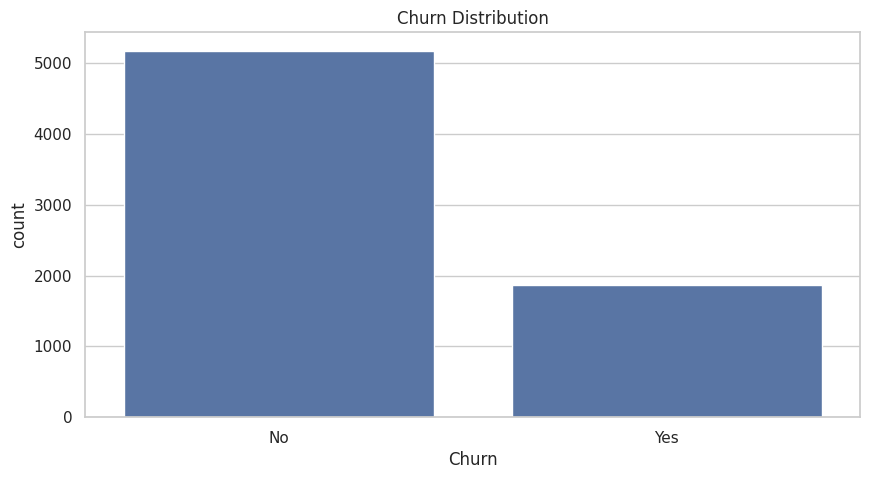

,proportion
Churn,
No,73.463013
Yes,26.536987


In [ ]:
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

# Percentage distribution
df['Churn'].value_counts(normalize=True) * 100


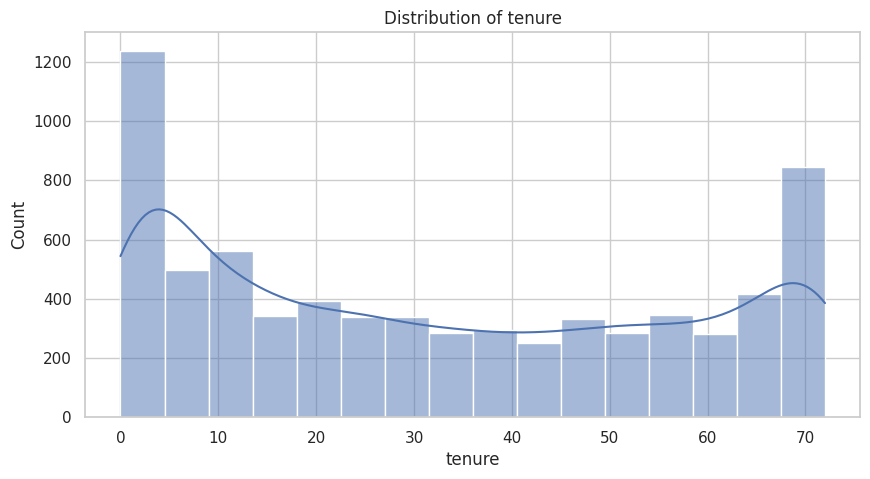

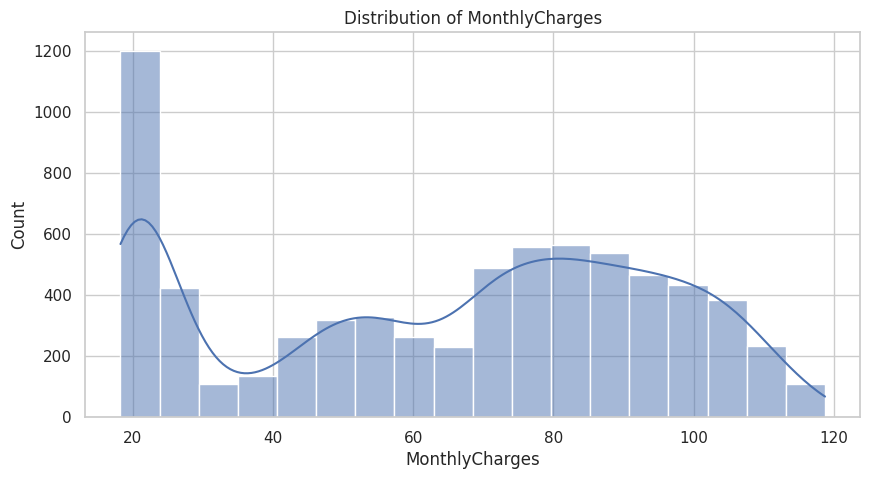

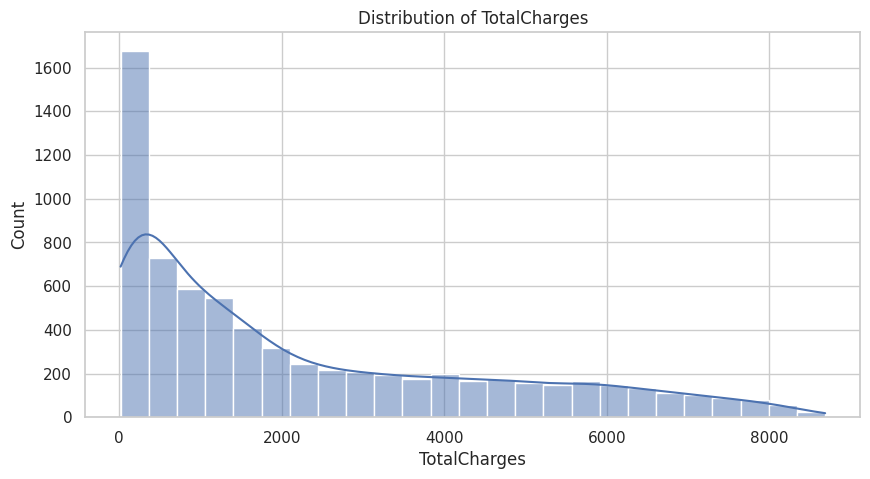

In [ ]:
# Plot distributions of numeric features
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


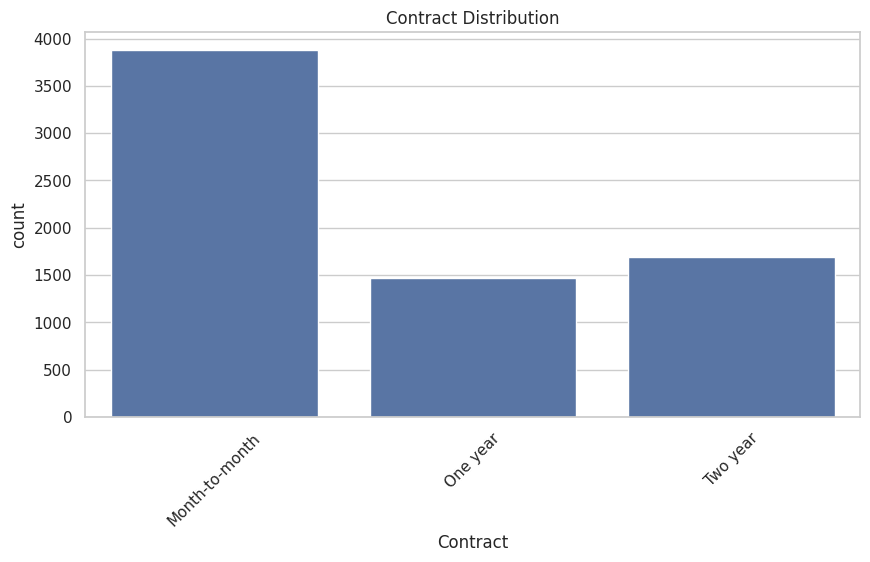

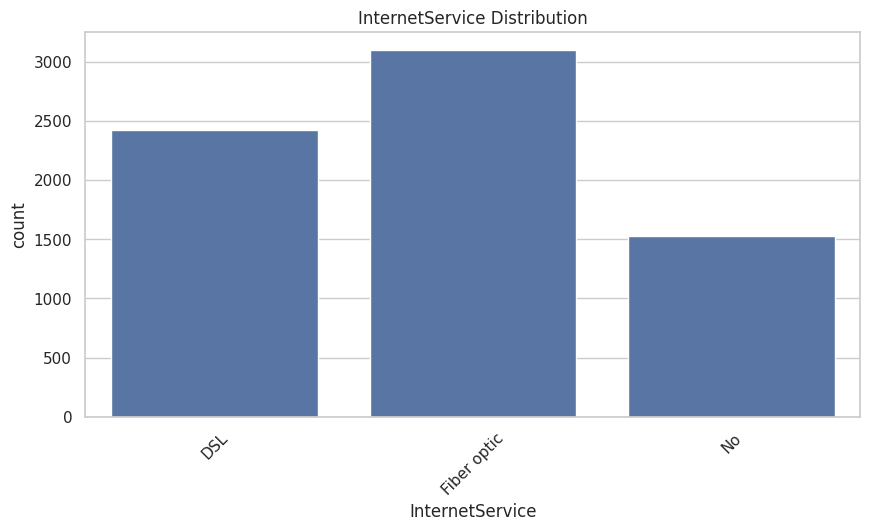

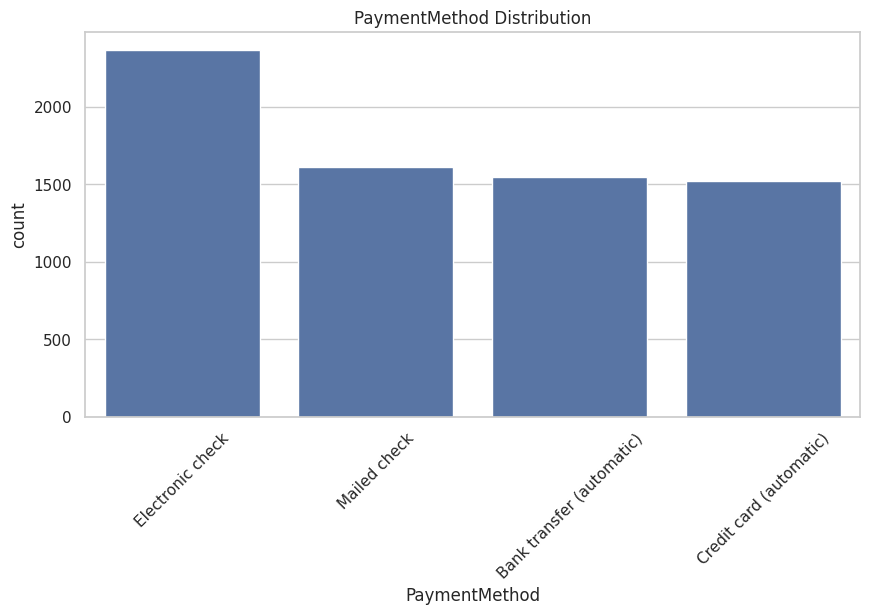

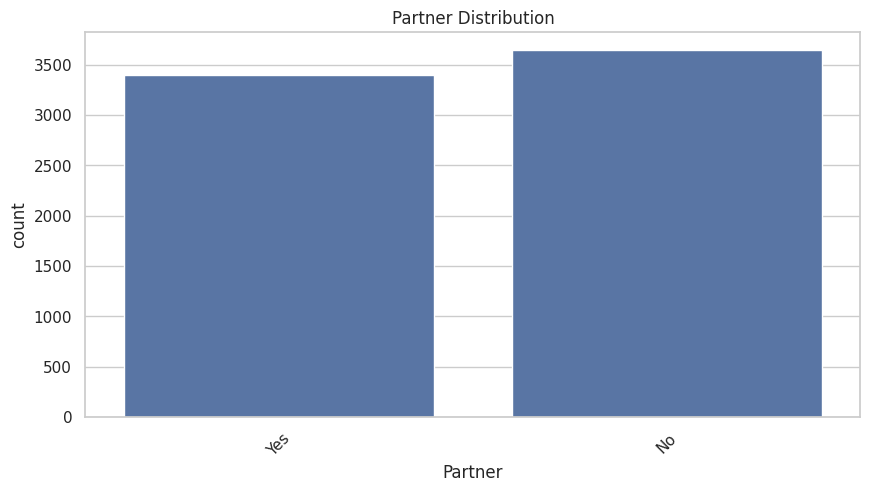

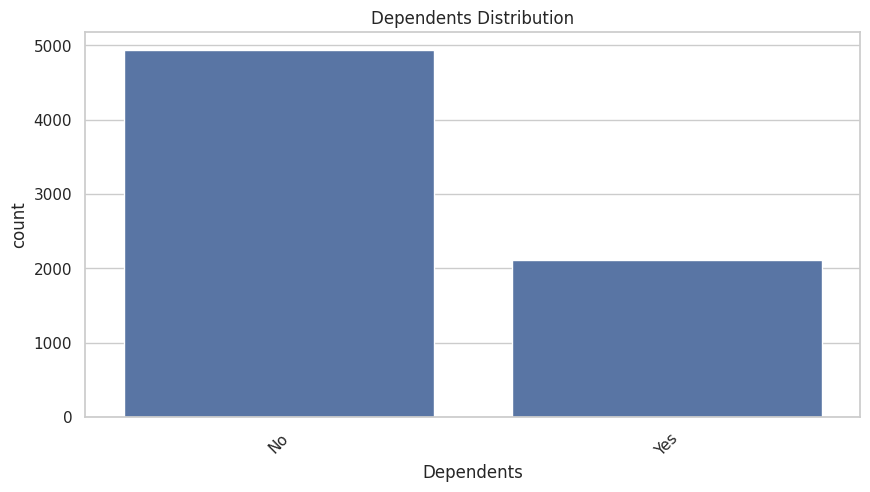

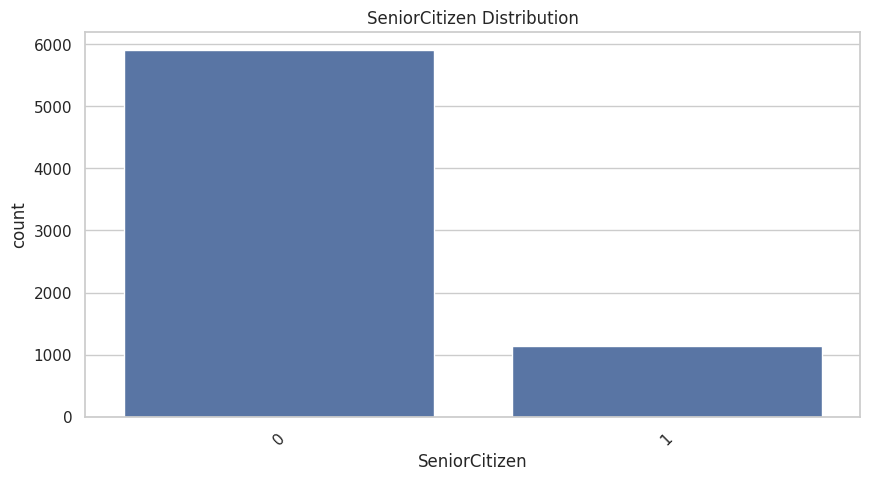

In [ ]:
# Show counts for each category in selected categorical columns
categorical_cols = ["Contract", "InternetService", "PaymentMethod",
                    "Partner", "Dependents", "SeniorCitizen"]

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()


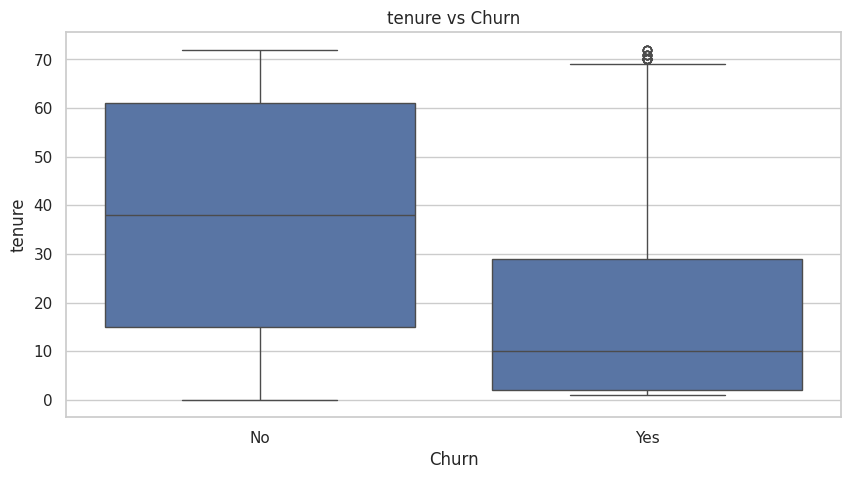

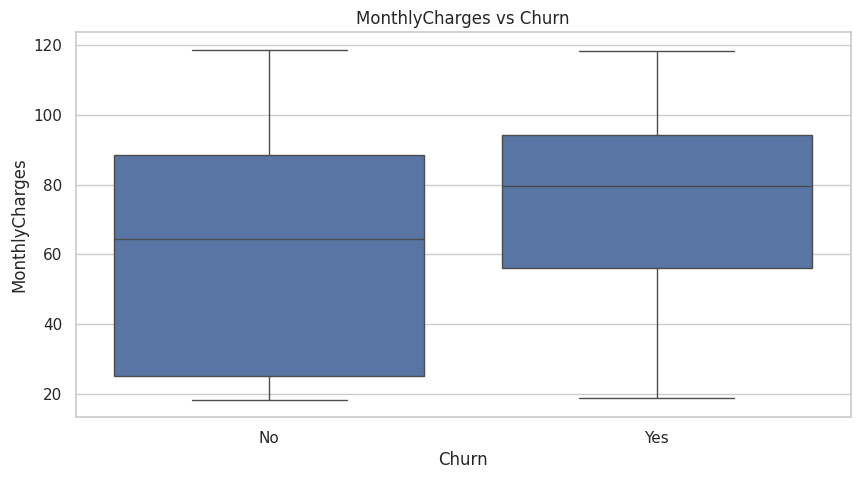

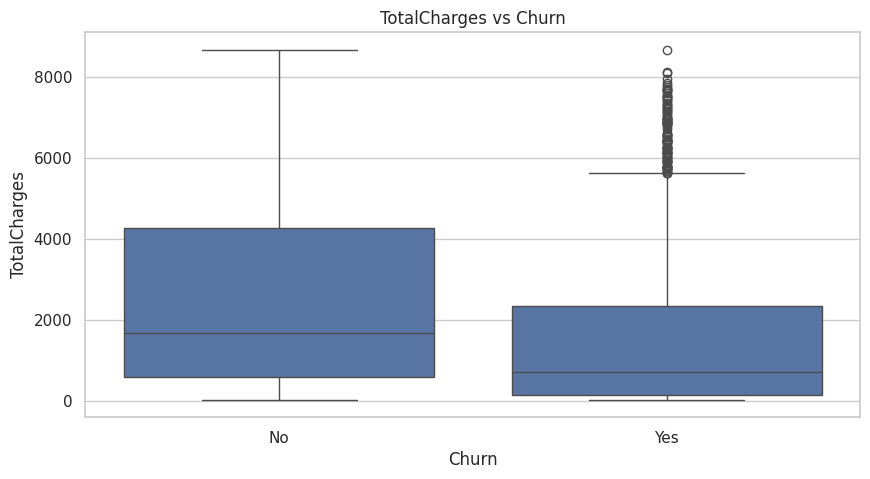

In [ ]:
# Compare numeric features between churned and non-churned customers
for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.show()


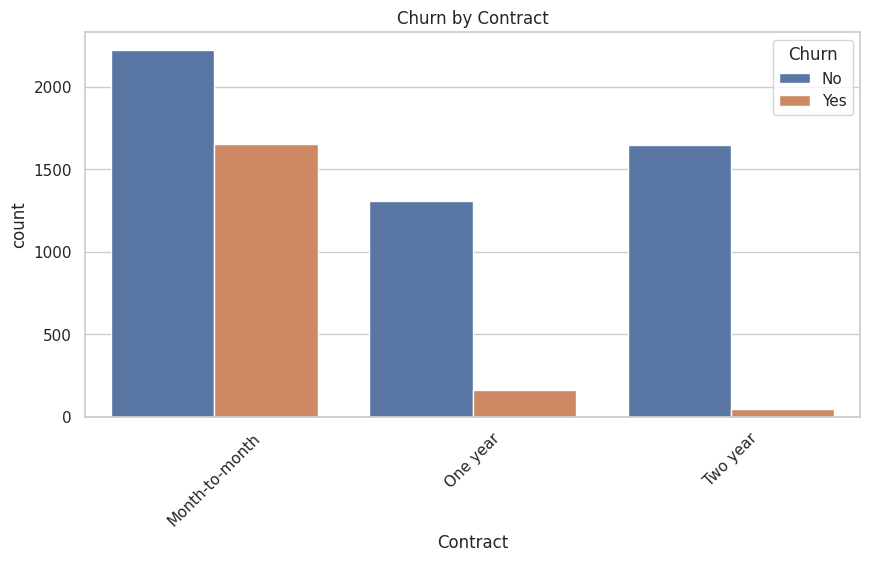

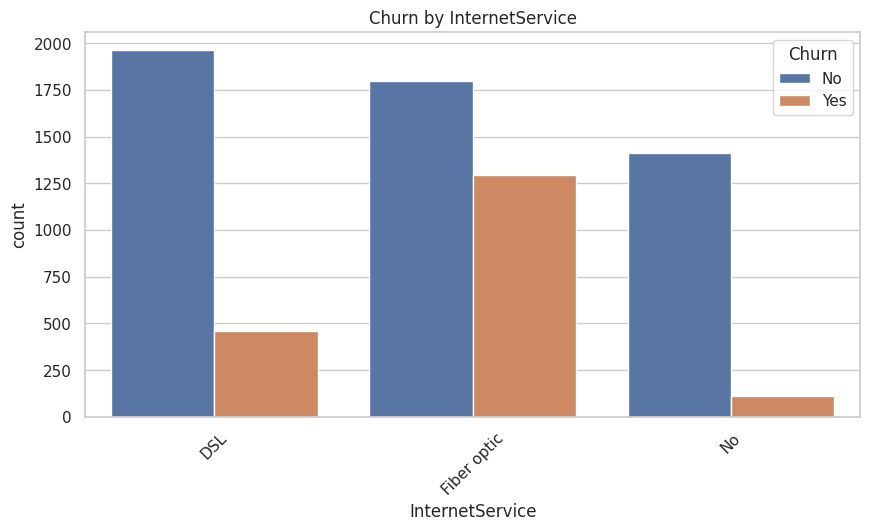

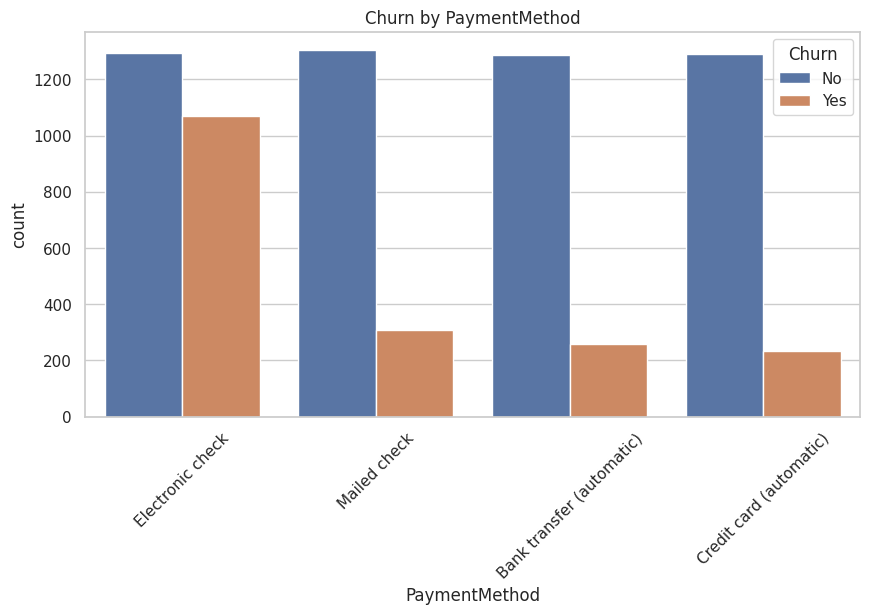

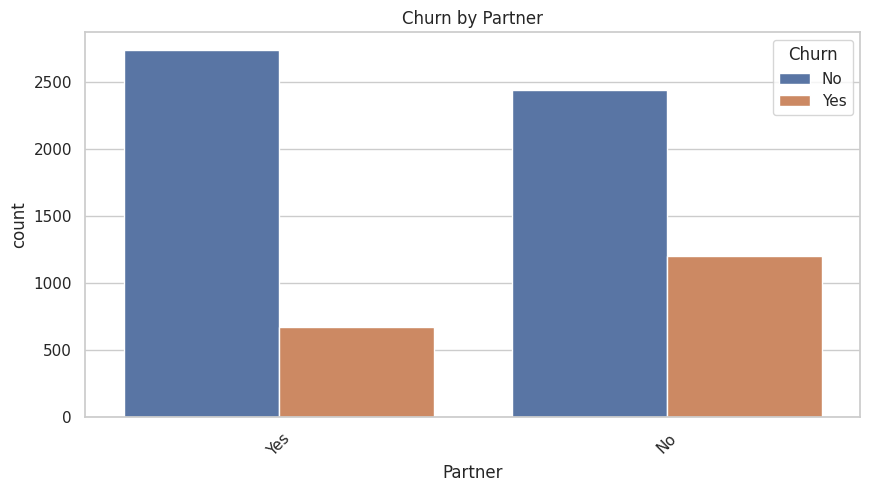

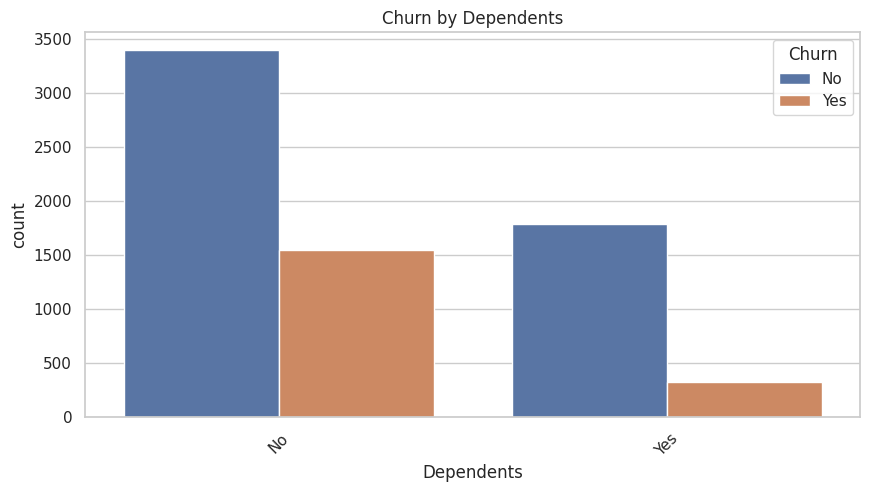

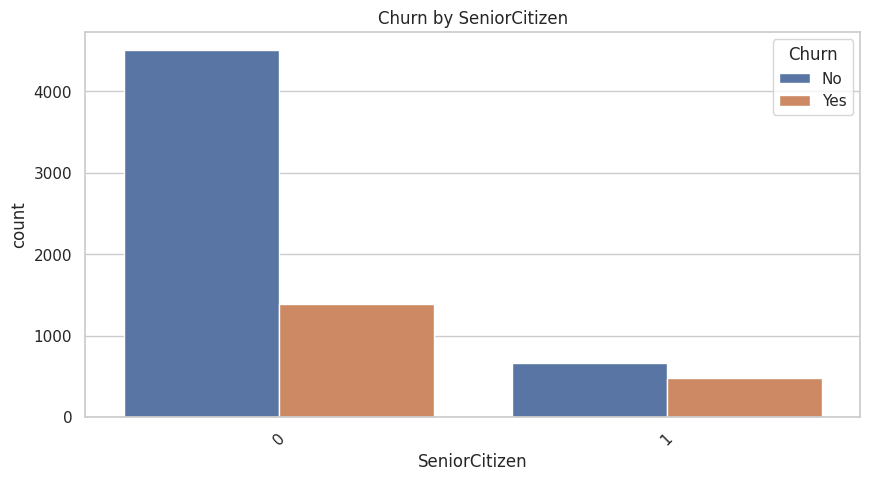

In [ ]:
# Show churn rates across different categories
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()


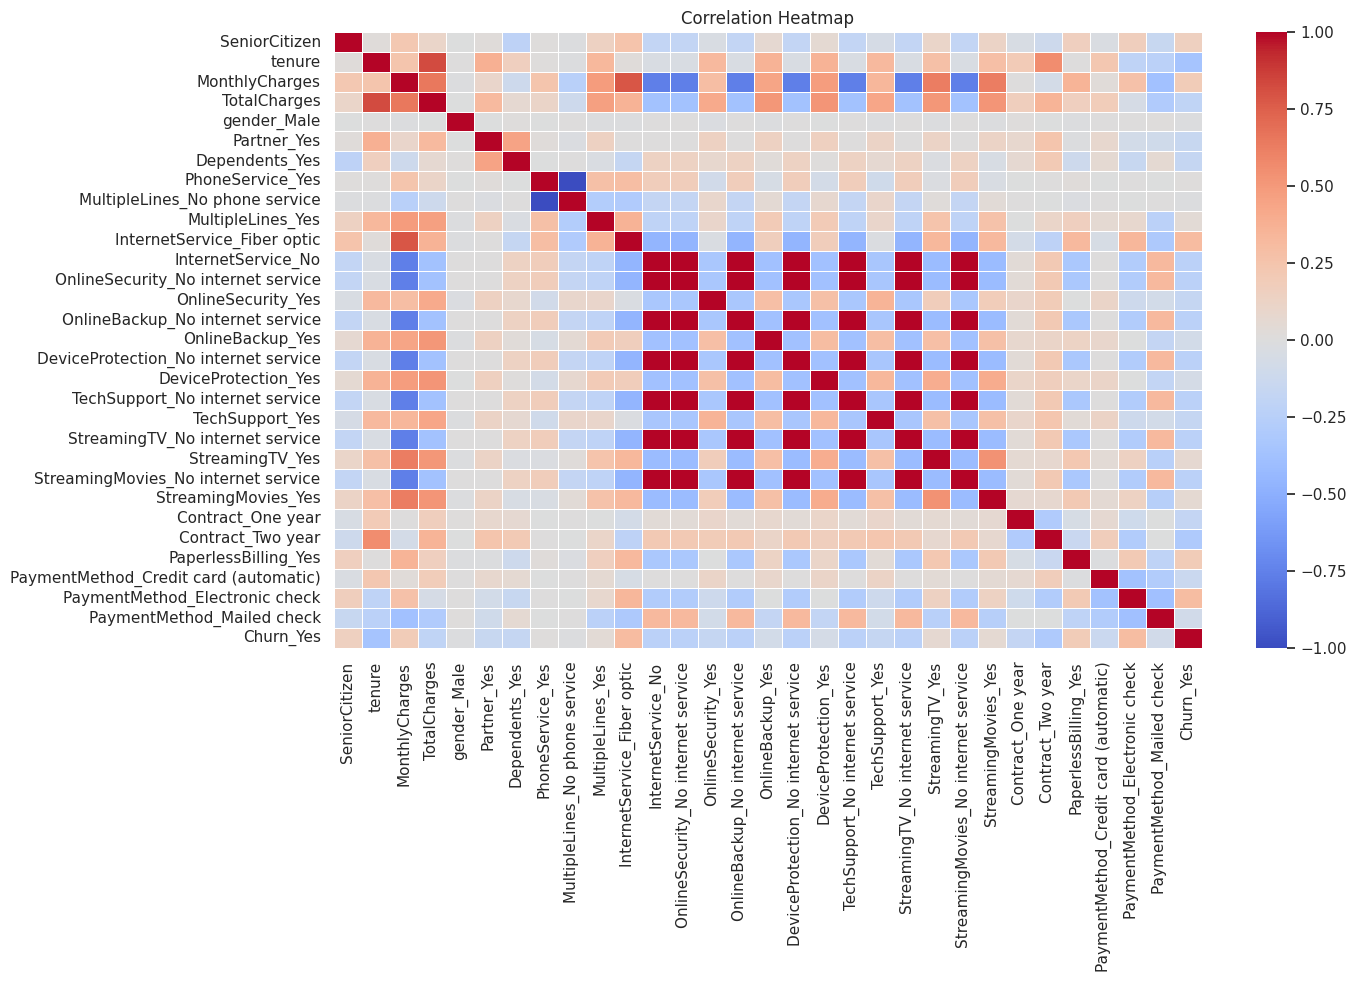

In [ ]:
# Create a heatmap to show correlations between all encoded features
df_encoded = pd.get_dummies(df.drop(columns=["customerID"]), drop_first=True)

plt.figure(figsize=(14, 8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
